# 0. Import libraries and load dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

## Paths

In [3]:
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  from google.colab import drive, userdata
  gdrive_string = '/content/drive'
  drive.mount(gdrive_string)

  dataset_path = f'{gdrive_string}/MyDrive/BPI DATA Wave 2025/Potential Datasets'
  employee_df = pd.read_csv(f'{dataset_path}/banking_employee_data.csv')
else:
  dataset_path = '../Datasets'
  # employee_df = pd.read_csv(f'{dataset_path}/Extended_Employee_Performance_and_Productivity_Data.csv')
  employee_df = pd.read_csv(f'{dataset_path}/banking_employee_data.csv')

# 1. Dataset Information

In [4]:
employee_df.sample(10)

,Department,Gender,Job_Title,Employee_ID,Age,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
21080,IT,Male,Data Scientist,21081,42,2016-10-22 18:00:00,9,Bachelor,3.87,125094,42,7,7,7,3,5,63,1,3.97,False
92640,Operations,Female,Business Analyst,92641,27,2024-11-26 18:00:00,1,Bachelor,2.67,49030,43,4,10,4,3,6,40,0,2.74,False
22944,Operations,Male,Customer Service Representative,22945,34,2017-04-01 00:00:00,8,Bachelor,3.11,34383,39,3,0,4,1,4,4,0,3.08,True
77978,Commercial Banking,Female,Loan Officer,77979,39,2023-08-21 12:00:00,2,Bachelor,2.34,35803,43,4,2,4,1,17,48,0,1.88,True
56764,Retail Banking,Female,Customer Service Representative,56765,45,2021-10-30 00:00:00,4,Bachelor,2.51,25425,41,2,0,5,2,3,49,0,2.33,True
95656,Commercial Banking,Female,Loan Officer,95657,40,2025-04-08,0,Bachelor,2.10,37383,44,4,4,4,3,6,7,0,1.99,False
35318,Risk Management,Male,Financial Analyst,35319,35,2019-05-21 12:00:00,6,Bachelor,3.12,63704,42,8,0,4,2,9,19,0,3.10,False
50030,Operations,Female,Operations Analyst,50031,28,2021-03-08,4,Bachelor,2.63,43197,41,4,0,3,4,7,9,0,3.14,True
69365,Wealth Management,Male,Financial Analyst,69366,36,2022-12-06 06:00:00,3,Bachelor,3.15,52403,45,5,5,3,4,4,26,0,3.19,False
22130,Operations,Other,Customer Service Representative,22131,34,2017-01-24 18:00:00,9,Bachelor,3.30,41389,42,4,0,3,4,7,21,0,3.44,True


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Department                   100000 non-null  object 
 1   Gender                       100000 non-null  object 
 2   Job_Title                    100000 non-null  object 
 3   Employee_ID                  100000 non-null  int64  
 4   Age                          100000 non-null  int64  
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  float64
 9   Monthly_Salary               100000 non-null  int64  
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [6]:
employee_df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,36.461500,5.669780,3.043252,66346.993530,42.04337,5.341100,3.092960,4.540830,2.46285,7.829950,29.301660,0.270120,3.108501
std,28867.657797,7.236828,4.687353,0.421232,41999.749367,2.29169,2.598064,4.211821,2.347839,0.93124,4.285095,20.574545,0.561639,0.605212
min,1.000000,22.000000,0.000000,1.630000,20773.000000,38.00000,1.000000,0.000000,0.000000,1.00000,2.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.750000,39221.000000,40.00000,3.000000,0.000000,3.000000,2.00000,5.000000,14.000000,0.000000,2.680000
50%,50000.500000,36.000000,4.000000,3.030000,53734.500000,42.00000,5.000000,0.000000,4.000000,2.00000,7.000000,25.000000,0.000000,3.110000
75%,75000.250000,42.000000,8.000000,3.320000,73346.250000,44.00000,7.000000,6.000000,6.000000,3.00000,10.000000,40.000000,0.000000,3.520000
max,100000.000000,59.000000,37.000000,5.000000,263406.000000,48.00000,17.000000,20.000000,15.000000,4.00000,25.000000,100.000000,4.000000,5.000000


# 2. Data Cleaning

In [7]:
# Convert 'Hire_Date' column to datetime
employee_df['Hire_Date'] = pd.to_datetime(employee_df['Hire_Date'], errors='coerce')

In [8]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Department                   100000 non-null  object        
 1   Gender                       100000 non-null  object        
 2   Job_Title                    100000 non-null  object        
 3   Employee_ID                  100000 non-null  int64         
 4   Age                          100000 non-null  int64         
 5   Hire_Date                    90000 non-null   datetime64[ns]
 6   Years_At_Company             100000 non-null  int64         
 7   Education_Level              100000 non-null  object        
 8   Performance_Score            100000 non-null  float64       
 9   Monthly_Salary               100000 non-null  int64         
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

# 3. Exploratory Data Analysis

## 3.1 Categorical Distributions


Total resignation rate: 22.92%


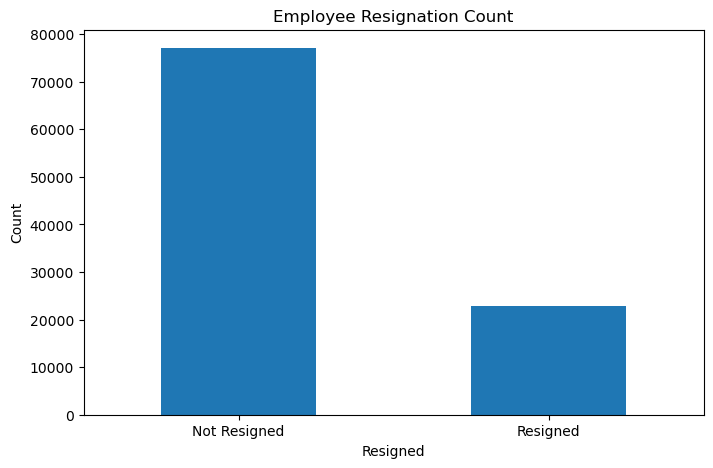

In [24]:
# Get the total resignation rate
total_resignation_rate = employee_df['Resigned'].value_counts(normalize=True).get(True, 0) * 100
print(f"\nTotal resignation rate: {total_resignation_rate:.2f}%")

# Plotting the resignation rate using df.plot(kind='bar')
plt.figure(figsize=(8, 5))
employee_df['Resigned'].value_counts().plot(kind='bar')
plt.title('Employee Resignation Count')
plt.xlabel('Resigned')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Resigned', 'Resigned'], rotation=0)
plt.show()

In [10]:
# Add age groups
age_bins = [0, 21, 31, 41, 51, 61, np.inf]
age_labels = ['<21', '21-30', '31-40', '41-50', '51-60', '>60']
employee_df['Age_Group'] = pd.cut(employee_df['Age'], bins=age_bins, labels=age_labels, right=False)

print(f'{employee_df[['Employee_ID', 'Age', 'Age_Group']].sample(5)}\n')
print(employee_df['Age_Group'].info())

       Employee_ID  Age Age_Group
2490          2491   51     51-60
50071        50072   39     31-40
81651        81652   34     31-40
32957        32958   35     31-40
51882        51883   44     41-50

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Age_Group
Non-Null Count   Dtype   
--------------   -----   
100000 non-null  category
dtypes: category(1)
memory usage: 98.0 KB
None


In [11]:
# Create a list of categorical columns
categorical_cols = employee_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)
print("Number of categorical columns:", len(categorical_cols))

Categorical columns: ['Department', 'Gender', 'Job_Title', 'Education_Level', 'Age_Group']
Number of categorical columns: 5


### 3.1.1. Employee count per category

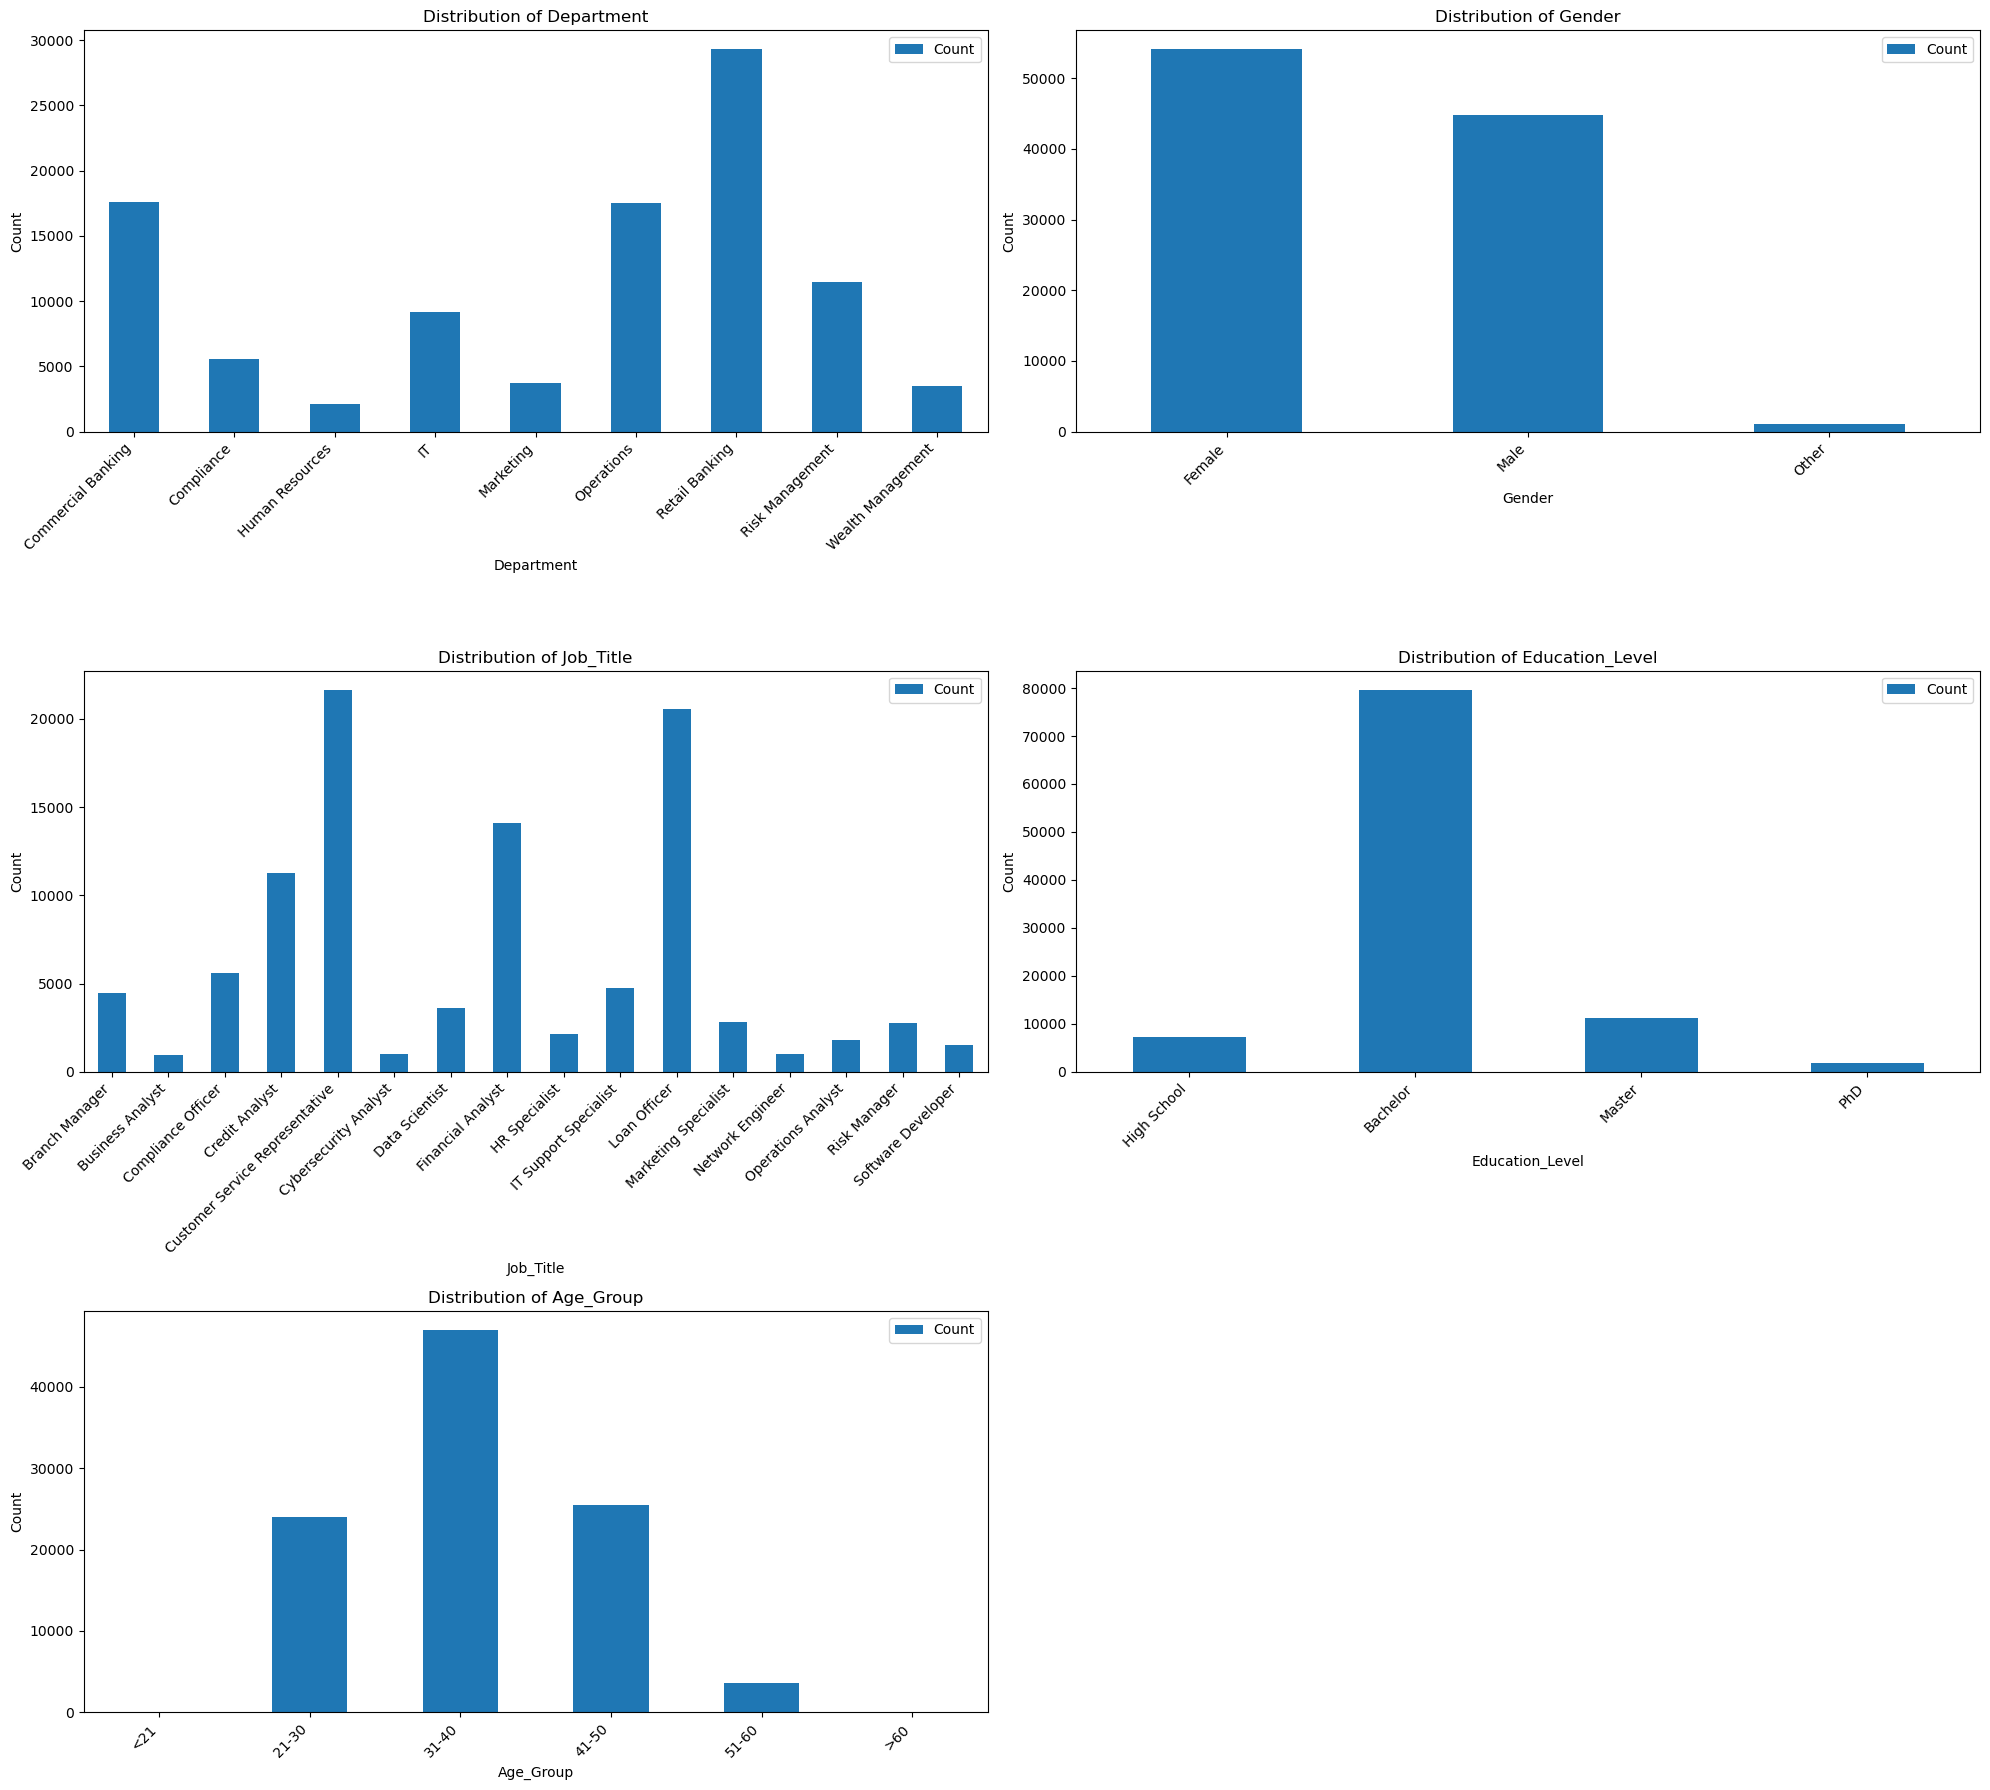

In [12]:
# Setup a 2-colun layout for plots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  ax = axes[i]
  if col == 'Education_Level':
    # Arrange from lowest to highest education level
    educ_order = ['High School', 'Bachelor', 'Master', 'PhD']

    educ_order_df = employee_df[col].astype(pd.CategoricalDtype(categories=educ_order, ordered=True))

    count_df = educ_order_df.value_counts(sort=False).reset_index(name='Count')
    count_df.columns = [col, 'Count']
    count_df.plot(kind='bar', x=col, y='Count', ax=ax)
  else:
    count_df = employee_df.groupby(col, observed=False).size().reset_index(name='Count')
    count_df.plot(kind='bar', x=col, y='Count', ax=ax)

  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')
  ax.tick_params(axis='x', rotation=45)
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')

# Hide any empty subplots
for i in range(len(categorical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Value counts per category
for col in categorical_cols:
  print(f"\nValue counts for {col}:")
  print(employee_df[col].value_counts())


Value counts for Department:
Department
Retail Banking        29296
Commercial Banking    17588
Operations            17533
Risk Management       11466
IT                     9175
Compliance             5587
Marketing              3703
Wealth Management      3499
Human Resources        2153
Name: count, dtype: int64

Value counts for Gender:
Gender
Female    54083
Male      44844
Other      1073
Name: count, dtype: int64

Value counts for Job_Title:
Job_Title
Customer Service Representative    21654
Loan Officer                       20548
Financial Analyst                  14118
Credit Analyst                     11248
Compliance Officer                  5587
IT Support Specialist               4765
Branch Manager                      4488
Data Scientist                      3610
Marketing Specialist                2815
Risk Manager                        2749
HR Specialist                       2153
Operations Analyst                  1807
Software Developer                  1500
Cy

### 3.1.2. 'Resign' count per category

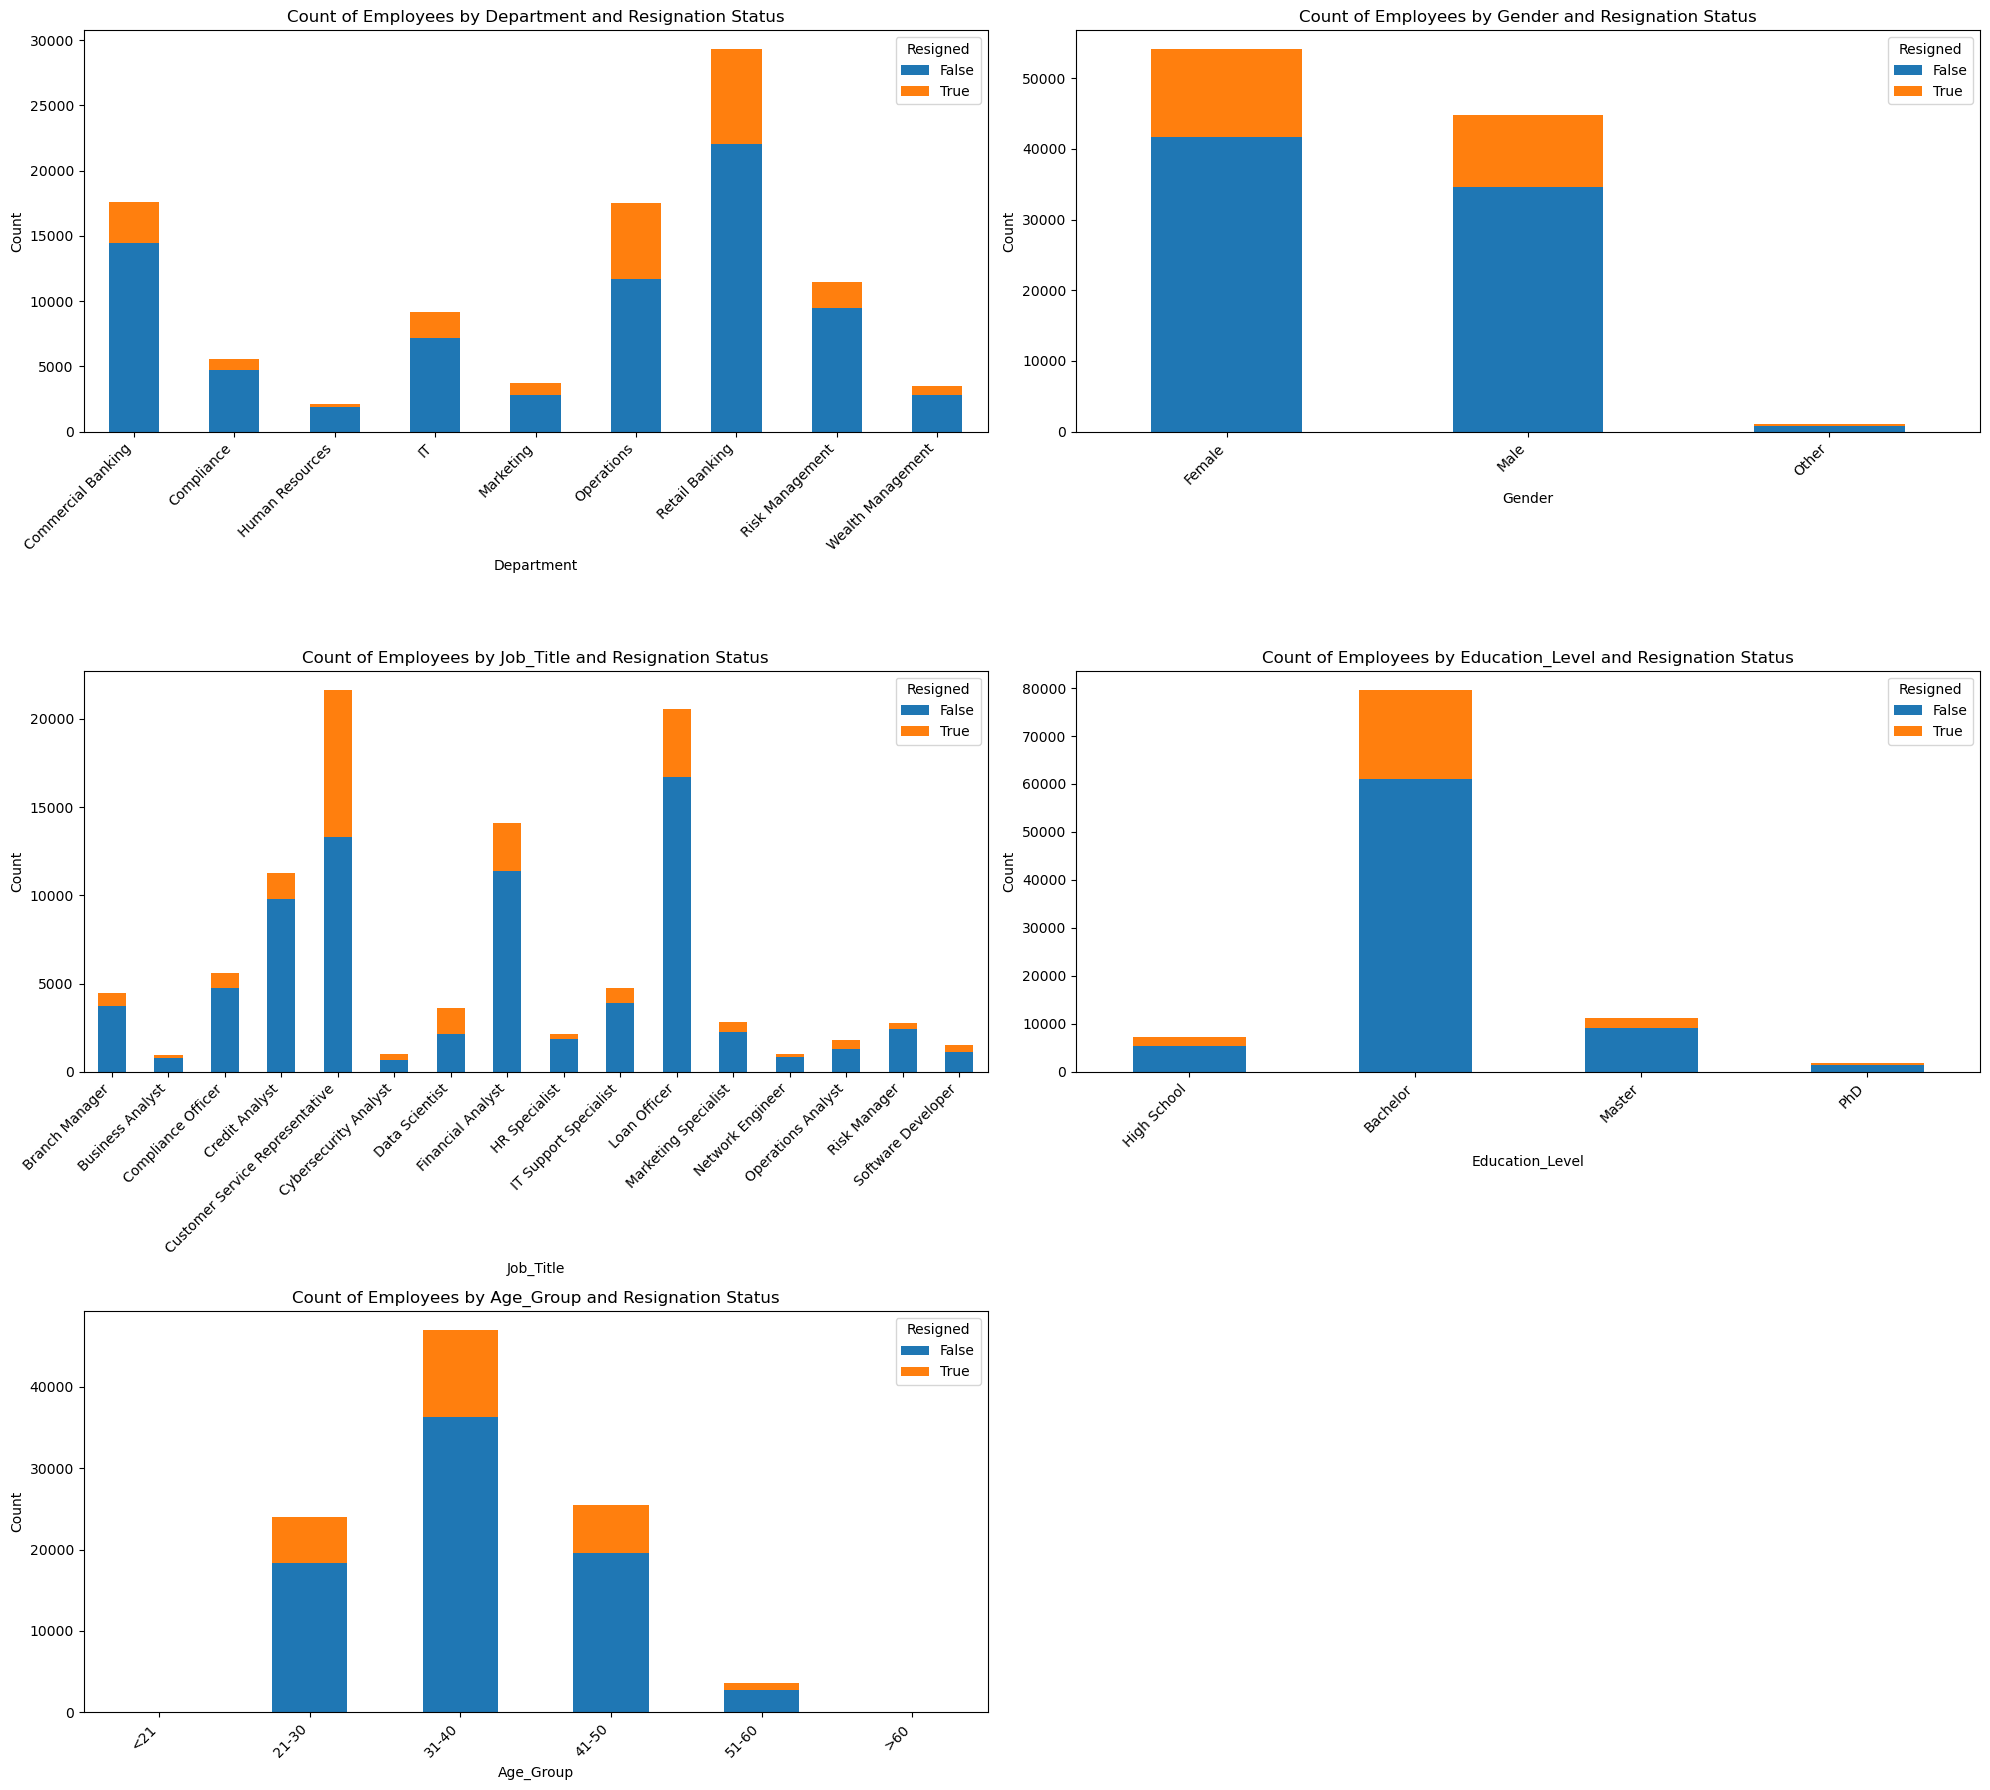

In [14]:
# Setup a 2-column layout for plots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  ax = axes[i]
  if col == 'Education_Level':
    # Arrange from lowest to highest education level
    educ_order = ['High School', 'Bachelor', 'Master', 'PhD']

    # Get the counts directly
    count_df = (
      employee_df.groupby([employee_df[col].astype(pd.CategoricalDtype(categories=educ_order, ordered=True)), 'Resigned'], observed=False).size()
      .unstack(fill_value=0)
    )
  else:
    # Get the counts directly
    count_df = (
      employee_df.groupby([col, 'Resigned'], observed=False).size()
      .unstack(fill_value=0)
    )
    
  count_df.plot(kind='bar', stacked=True, ax=ax)
  ax.set_title(f'Count of Employees by {col} and Resignation Status')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')
  
  ax.tick_params(axis='x', rotation=45)
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')
  ax.legend(title='Resigned')

# Hide any empty subplots
for i in range(len(categorical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Value counts for 'Resigned' by category
for col in categorical_cols:
  print(f"\nValue counts for 'Resigned' by {col}:")
  print(employee_df.groupby([col, 'Resigned']).size().unstack(fill_value=0))


Value counts for 'Resigned' by Department:
Resigned            False  True 
Department                      
Commercial Banking  14445   3143
Compliance           4757    830
Human Resources      1883    270
IT                   7197   1978
Marketing            2786    917
Operations          11696   5837
Retail Banking      22048   7248
Risk Management      9464   2002
Wealth Management    2807    692

Value counts for 'Resigned' by Gender:
Resigned  False  True 
Gender                
Female    41654  12429
Male      34583  10261
Other       846    227

Value counts for 'Resigned' by Job_Title:
Resigned                         False  True 
Job_Title                                    
Branch Manager                    3718    770
Business Analyst                   771    187
Compliance Officer                4757    830
Credit Analyst                    9793   1455
Customer Service Representative  13330   8324
Cybersecurity Analyst              690    310
Data Scientist             

/var/folders/03/3b_xhy_j4mz29t7qchz8vkgh0000gp/T/ipykernel_3107/2195465180.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(employee_df.groupby([col, 'Resigned']).size().unstack(fill_value=0))


### 3.1.3. 'Resign' proportion per category

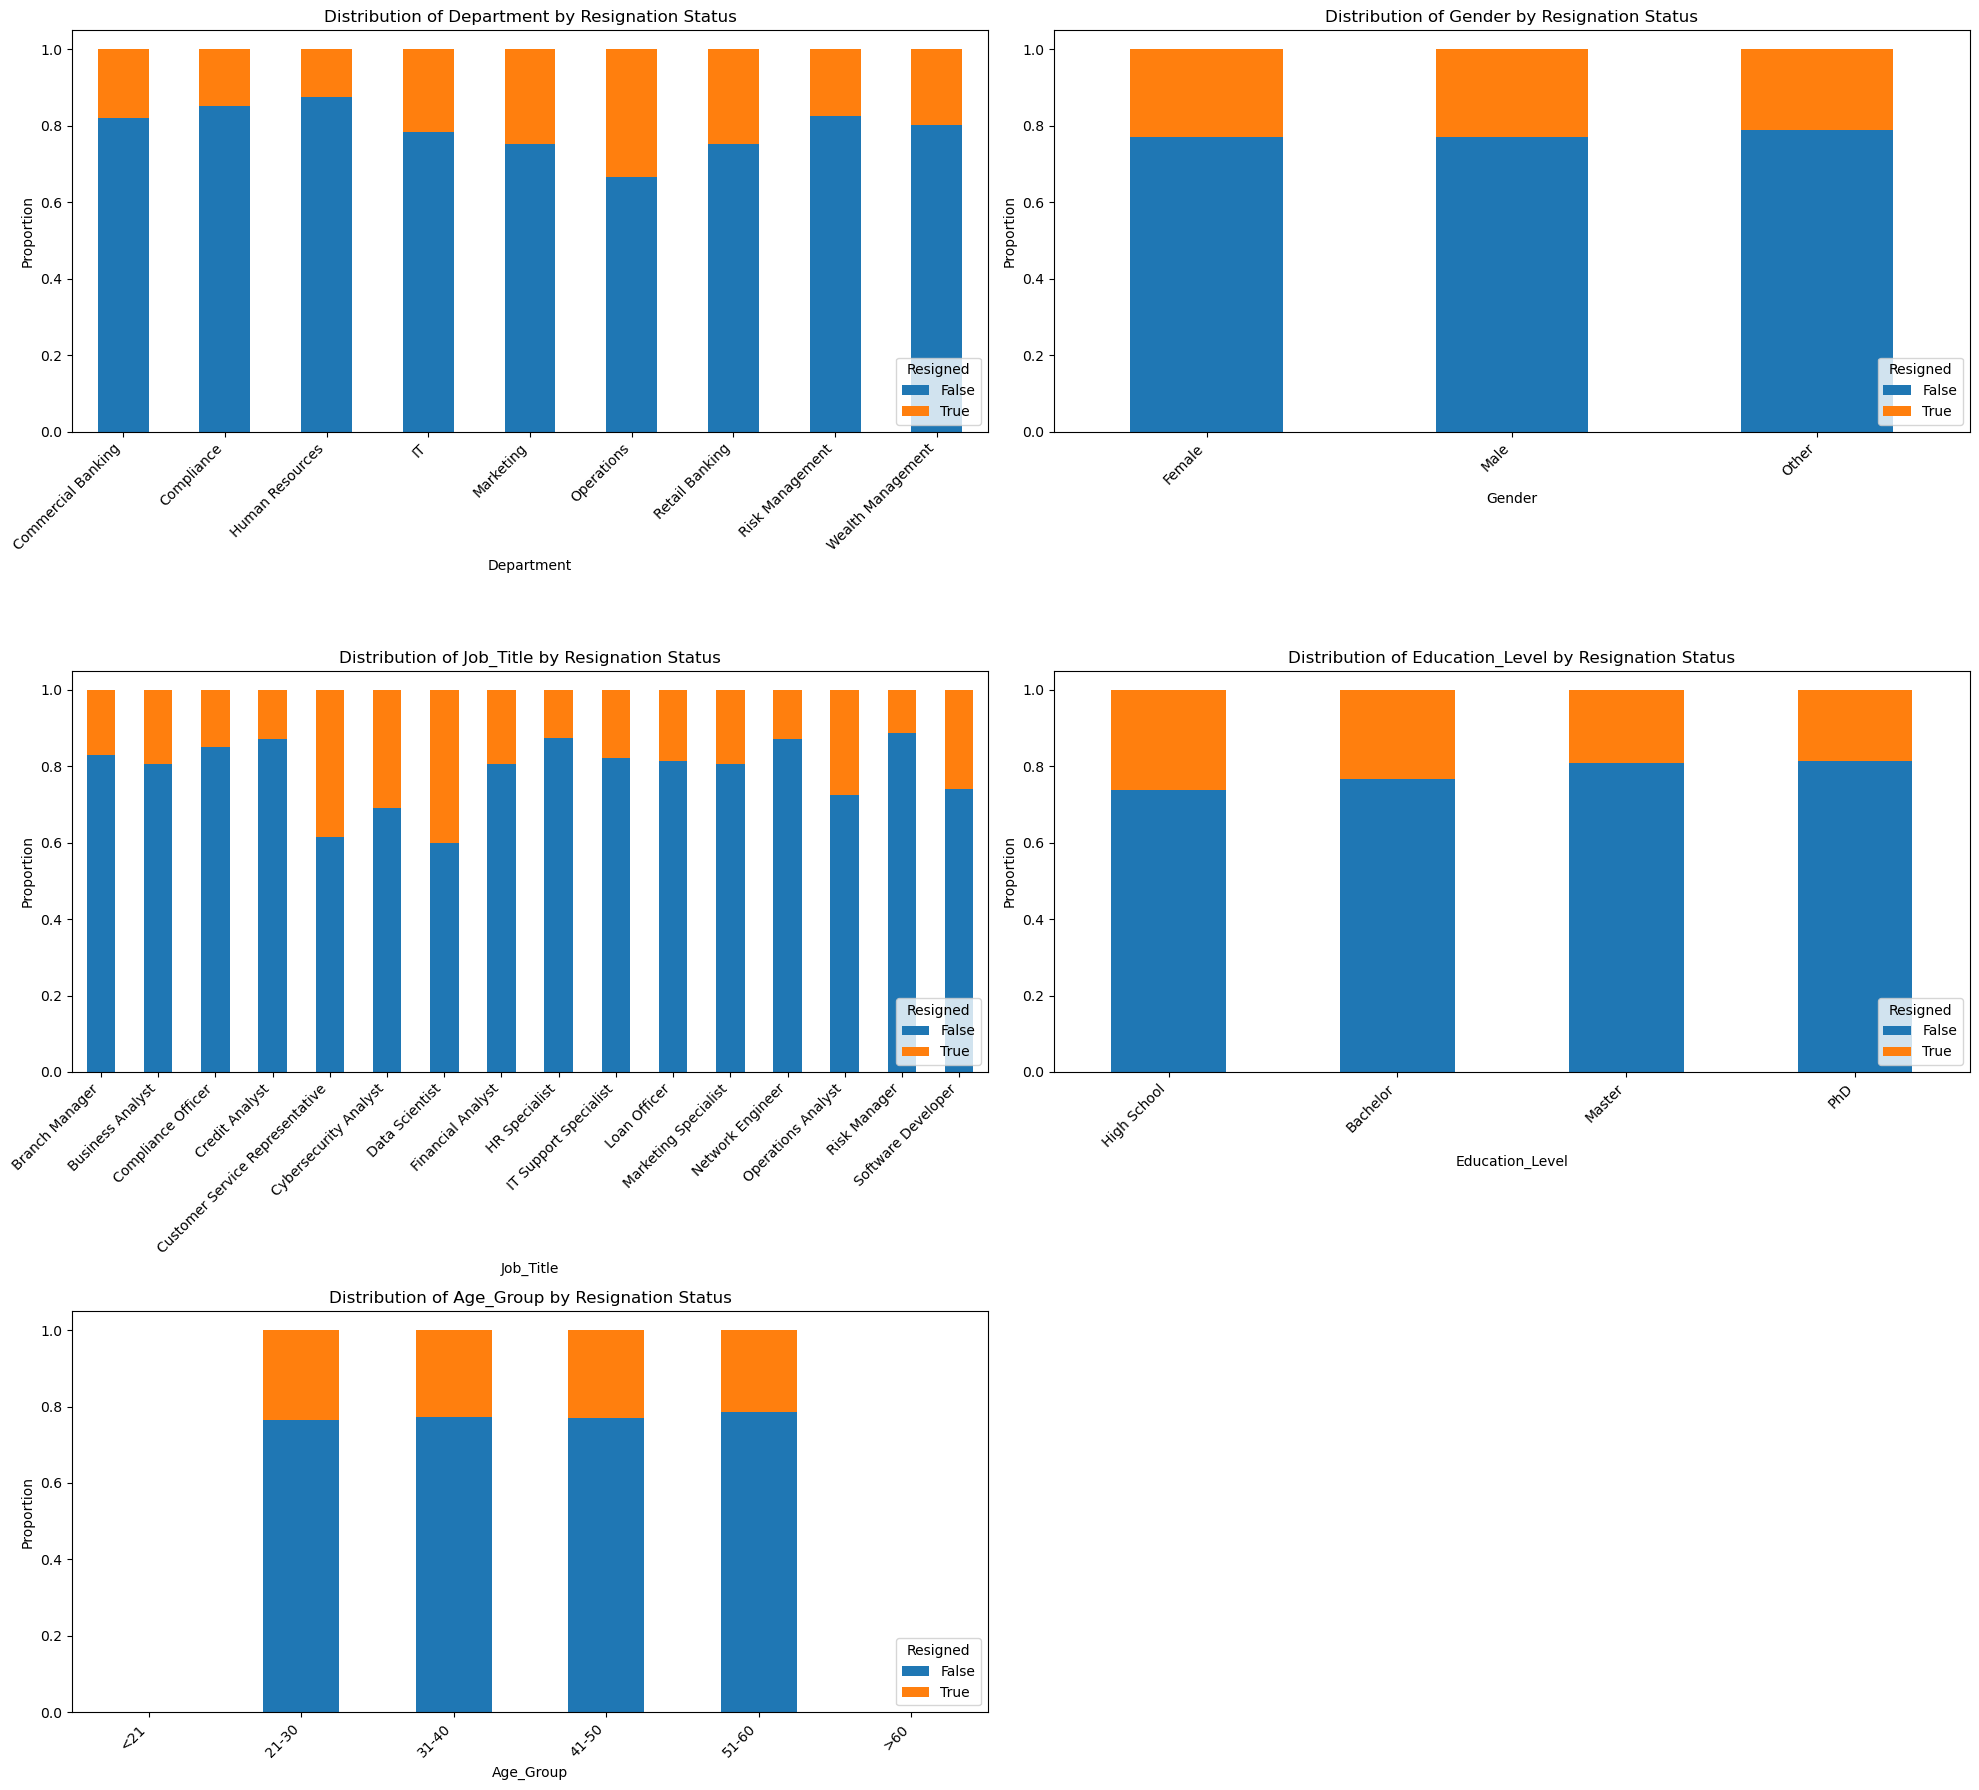

In [16]:
# Setup a 2-column layout for plots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  ax = axes[i]
  if col == 'Education_Level':
    # Arrange from lowest to highest education level
    educ_order = ['High School', 'Bachelor', 'Master', 'PhD']

    prop_df = (
      employee_df.groupby([employee_df[col].astype(pd.CategoricalDtype(categories=educ_order, ordered=True)), 'Resigned'], observed=False).size()
      .unstack(fill_value=0)
      .apply(lambda x: x / x.sum(), axis=1)
    )
  else:
    prop_df = (
      employee_df.groupby([col, 'Resigned'], observed=False).size()
      .unstack(fill_value=0)
      .apply(lambda x: x / x.sum(), axis=1)
    )
    
  prop_df.plot(kind='bar', stacked=True, ax=ax)
  ax.set_title(f'Distribution of {col} by Resignation Status')
  ax.set_xlabel(col)
  ax.set_ylabel('Proportion')
  ax.tick_params(axis='x', rotation=45)
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')
  ax.legend(title='Resigned', loc='lower right')

# Hide any empty subplots
for i in range(len(categorical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
# Percentage of 'Resigned' by category
for col in categorical_cols:
  print(f"\nPercentage of 'Resigned' by {col}:")
  prop_df = (
    employee_df.groupby([col, 'Resigned'], observed=False).size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
  )
  print(prop_df *  100)  # Convert to percentage for better readability


Percentage of 'Resigned' by Department:
Resigned                False      True 
Department                              
Commercial Banking  82.129861  17.870139
Compliance          85.144084  14.855916
Human Resources     87.459359  12.540641
IT                  78.441417  21.558583
Marketing           75.236295  24.763705
Operations          66.708493  33.291507
Retail Banking      75.259421  24.740579
Risk Management     82.539683  17.460317
Wealth Management   80.222921  19.777079

Percentage of 'Resigned' by Gender:
Resigned      False      True 
Gender                        
Female    77.018657  22.981343
Male      77.118455  22.881545
Other     78.844362  21.155638

Percentage of 'Resigned' by Job_Title:
Resigned                             False      True 
Job_Title                                            
Branch Manager                   82.843137  17.156863
Business Analyst                 80.480167  19.519833
Compliance Officer               85.144084  14.855916
Credit

In [18]:
# Get rows where 'Job_Title' is 'Data Scientist', 'Employee_Satisfaction_Score' is greater than 3.5, and 'Resigned' is True
data_scientist_resigned = employee_df[
    (employee_df['Job_Title'] == 'Data Scientist') &
    (employee_df['Employee_Satisfaction_Score'] > 3.5) &
    (employee_df['Resigned'] == True)
]

data_scientist_resigned.sample(10)

,Department,Gender,Job_Title,Employee_ID,Age,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Age_Group
19919,Operations,Female,Data Scientist,19920,35,2016-07-16 18:00:00,9,Bachelor,3.27,168286,...,7,7,6,1,11,27,1,3.80,True,31-40
32506,Operations,Male,Data Scientist,32507,35,2018-12-22 06:00:00,7,Bachelor,3.34,150861,...,6,1,2,2,7,66,1,3.59,True,31-40
20662,Risk Management,Male,Data Scientist,20663,37,2016-09-17 18:00:00,9,Master,3.65,162406,...,9,1,4,3,7,46,1,4.25,True,31-40
34199,Risk Management,Female,Data Scientist,34200,39,2019-03-28 12:00:00,6,PhD,3.78,154749,...,9,2,4,2,10,45,0,3.85,True,31-40
47186,IT,Male,Data Scientist,47187,34,2020-11-09 18:00:00,5,High School,3.56,155020,...,9,14,5,3,11,43,1,4.00,True,31-40
14775,Operations,Male,Data Scientist,14776,38,2015-02-20 12:00:00,10,Master,3.98,145153,...,9,14,3,3,6,61,1,4.05,True,31-40
46852,IT,Male,Data Scientist,46853,45,2020-10-26 18:00:00,5,Bachelor,2.91,153126,...,5,0,7,3,3,12,0,3.55,True,41-50
27025,Marketing,Female,Data Scientist,27026,40,2018-01-19 00:00:00,8,Bachelor,3.03,118761,...,6,2,2,4,10,7,1,3.51,True,31-40
75846,Operations,Female,Data Scientist,75847,41,2023-06-20 12:00:00,2,Bachelor,2.72,129736,...,4,11,6,3,7,5,0,3.58,True,41-50
12043,Marketing,Female,Data Scientist,12044,36,2014-03-16 06:00:00,11,Master,3.21,97751,...,10,0,4,1,18,16,0,3.55,True,31-40


### 3.2 Numerical Distribution

In [19]:
# Get numerical columns
numerical_cols = employee_df.select_dtypes(include=[np.number]).columns.tolist()

if 'Employee_ID' in numerical_cols:
  numerical_cols.remove('Employee_ID')

print("Numerical columns:")
for col in numerical_cols:
  print(f'  {col}')
print("Number of numerical columns:", len(numerical_cols))

Numerical columns:
  Age
  Years_At_Company
  Performance_Score
  Monthly_Salary
  Work_Hours_Per_Week
  Projects_Handled
  Overtime_Hours
  Sick_Days
  Remote_Work_Frequency
  Team_Size
  Training_Hours
  Promotions
  Employee_Satisfaction_Score
Number of numerical columns: 13
